# ANALISIS ESTADISTICO DE DATASET : ECOMMERCE CHURN
## FUENTE : [KAGGLE](https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data)

# AUTOR : César Mayta

# PASO 1 - IMPORTAMOS LIBRERIAS

In [2]:
!pip install pyjanitor

  Using cached pyjanitor-0.31.0-py3-none-any.whl.metadata (6.1 kB)
Using cached pyjanitor-0.31.0-py3-none-any.whl (215 kB)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
import missingno

# PASO 2 - EJECUTAMOS PANDAS MISSING EXTENSION NOTEBOOK

In [5]:
%run '/content/pandas_missing_extension.ipynb'

# PASO 3 - CARGAMOS DATASET

In [6]:
data_df = pd.read_csv('/content/ecom_data.csv')
data_df.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


# PASO 4 - EDA

In [7]:
data_df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [8]:
data_df.dtypes.value_counts()

,count
int64,8
float64,7
object,5


In [9]:
data_df.shape

(5630, 20)

In [10]:
data_df.drop('CustomerID',axis=1,inplace=True)

# PASO 5 - TRATAMIENTO DE DATOS FALTANTES

In [11]:
data_df.missing.number_missing()

np.int64(1856)

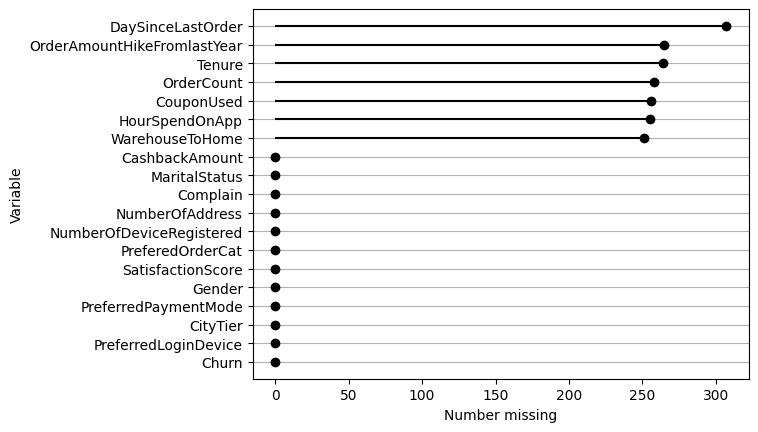

In [12]:
data_df.missing.missing_variable_plot()

<Axes: >

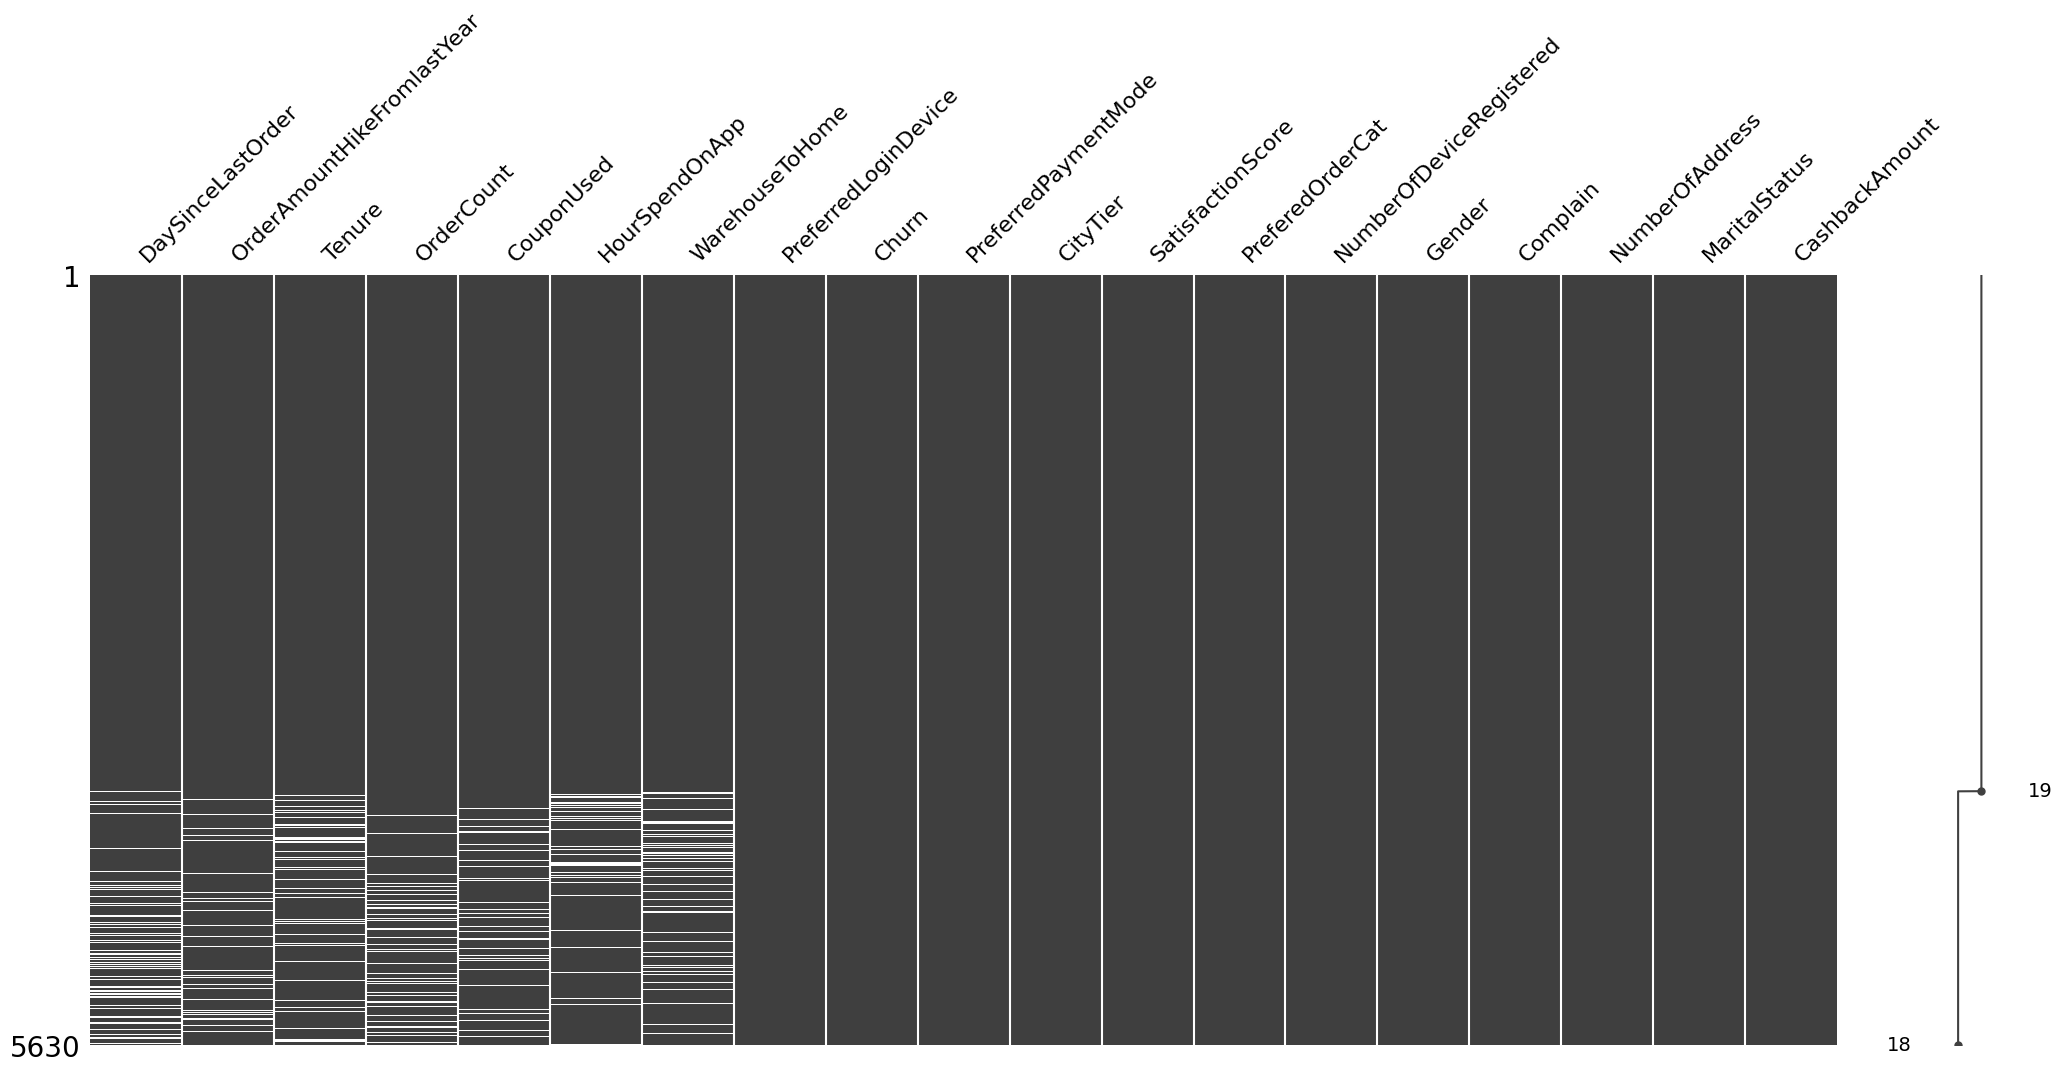

In [13]:

(
    data_df.missing.sort_variables_by_missingness()
    .pipe(
        missingno.matrix,sort='descending'
    )
)

In [14]:
data_df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## CAMBIAMOS LA NOMENCLATURA DE COLUMNAS

In [15]:
data_df_raw = (
    data_df.clean_names(
        case_type="snake"
    )
)
data_df_raw.head(2)

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


In [16]:
data_df_raw.columns

Index(['churn', 'tenure', 'preferred_login_device', 'city_tier',
       'warehouse_to_home', 'preferred_payment_mode', 'gender',
       'hour_spend_on_app', 'number_of_device_registered',
       'prefered_order_cat', 'satisfaction_score', 'marital_status',
       'number_of_address', 'complain', 'order_amount_hike_fromlast_year',
       'coupon_used', 'order_count', 'day_since_last_order',
       'cashback_amount'],
      dtype='object')

## Imputación de day_since_last_order

In [17]:
missing_variable = 'day_since_last_order'

## IMPUTACIÓN POR  MEDIA

In [18]:
data_df_clean_mean = data_df_raw.copy()
data_df_clean_mean['day_since_last_order'] = data_df_clean_mean['day_since_last_order'].fillna(data_df_clean_mean['day_since_last_order'].mean())
print(f" media original : {data_df_raw['day_since_last_order'].mean()} | media sin nulos : {data_df_clean_mean['day_since_last_order'].mean()}")


 media original : 4.543490512868683 | media sin nulos : 4.543490512868684


## IMPUTACIÓN POR MEDIANA

In [19]:
data_df_clean_median = data_df_raw.copy()
data_df_clean_median['day_since_last_order'] = data_df_clean_median['day_since_last_order'].fillna(data_df_clean_median['day_since_last_order'].median())
print(f" media original : {data_df_raw['day_since_last_order'].median()} | media sin nulos : {data_df_clean_median['day_since_last_order'].median()}")

 media original : 3.0 | media sin nulos : 3.0


## IMPUTACIÓN POR MODA

In [20]:
data_df_clean_mode = data_df_raw.copy()
data_df_clean_mode['day_since_last_order'] = data_df_clean_mode['day_since_last_order'].fillna(data_df_clean_mode['day_since_last_order'].mode())
print(f" media original : {data_df_raw['day_since_last_order'].mode()} | media sin nulos : {data_df_clean_mode['day_since_last_order'].mode()}")

 media original : 0    3.0
Name: day_since_last_order, dtype: float64 | media sin nulos : 0    3.0
Name: day_since_last_order, dtype: float64


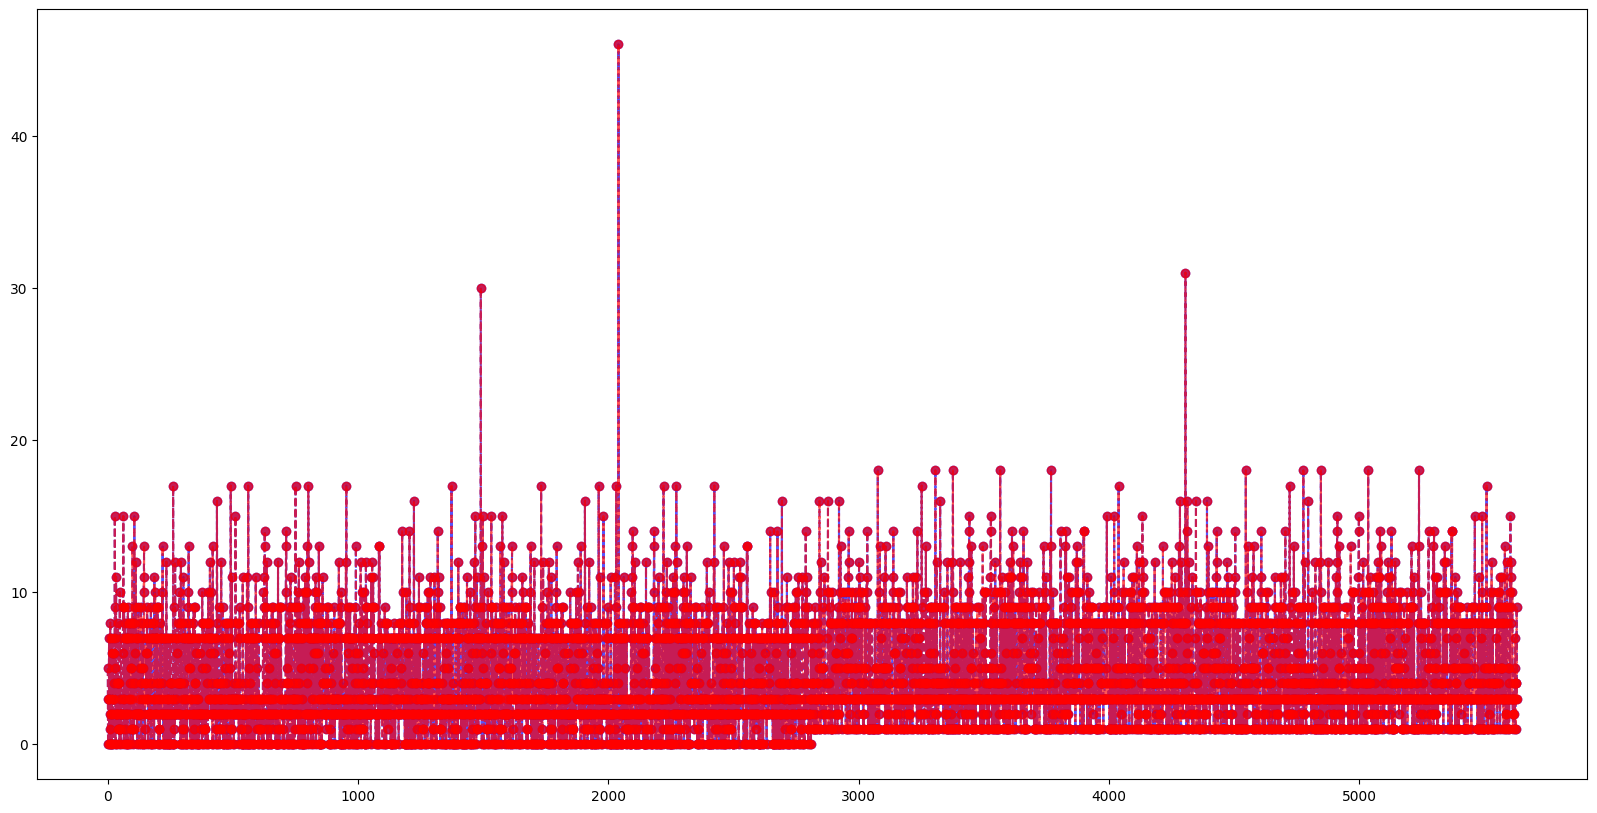

In [21]:
plt.figure(figsize=(20,10))
data_df_raw['day_since_last_order'].plot(color='blue',marker='o',alpha=6/9,linestyle='dashed')
data_df_clean_median['day_since_last_order'].plot(color='red',marker='o',alpha=6/9,linestyle='dashed')
plt.show()

In [22]:
data_df_clean = data_df_clean_median

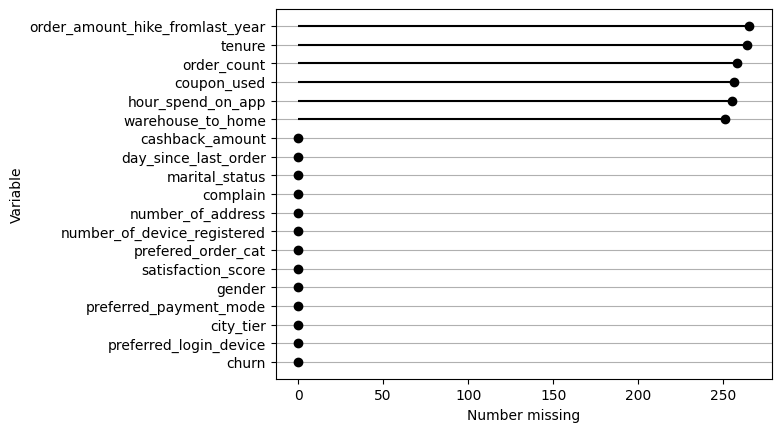

In [23]:
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE order_amount_hike_fromlast_year

<Axes: >

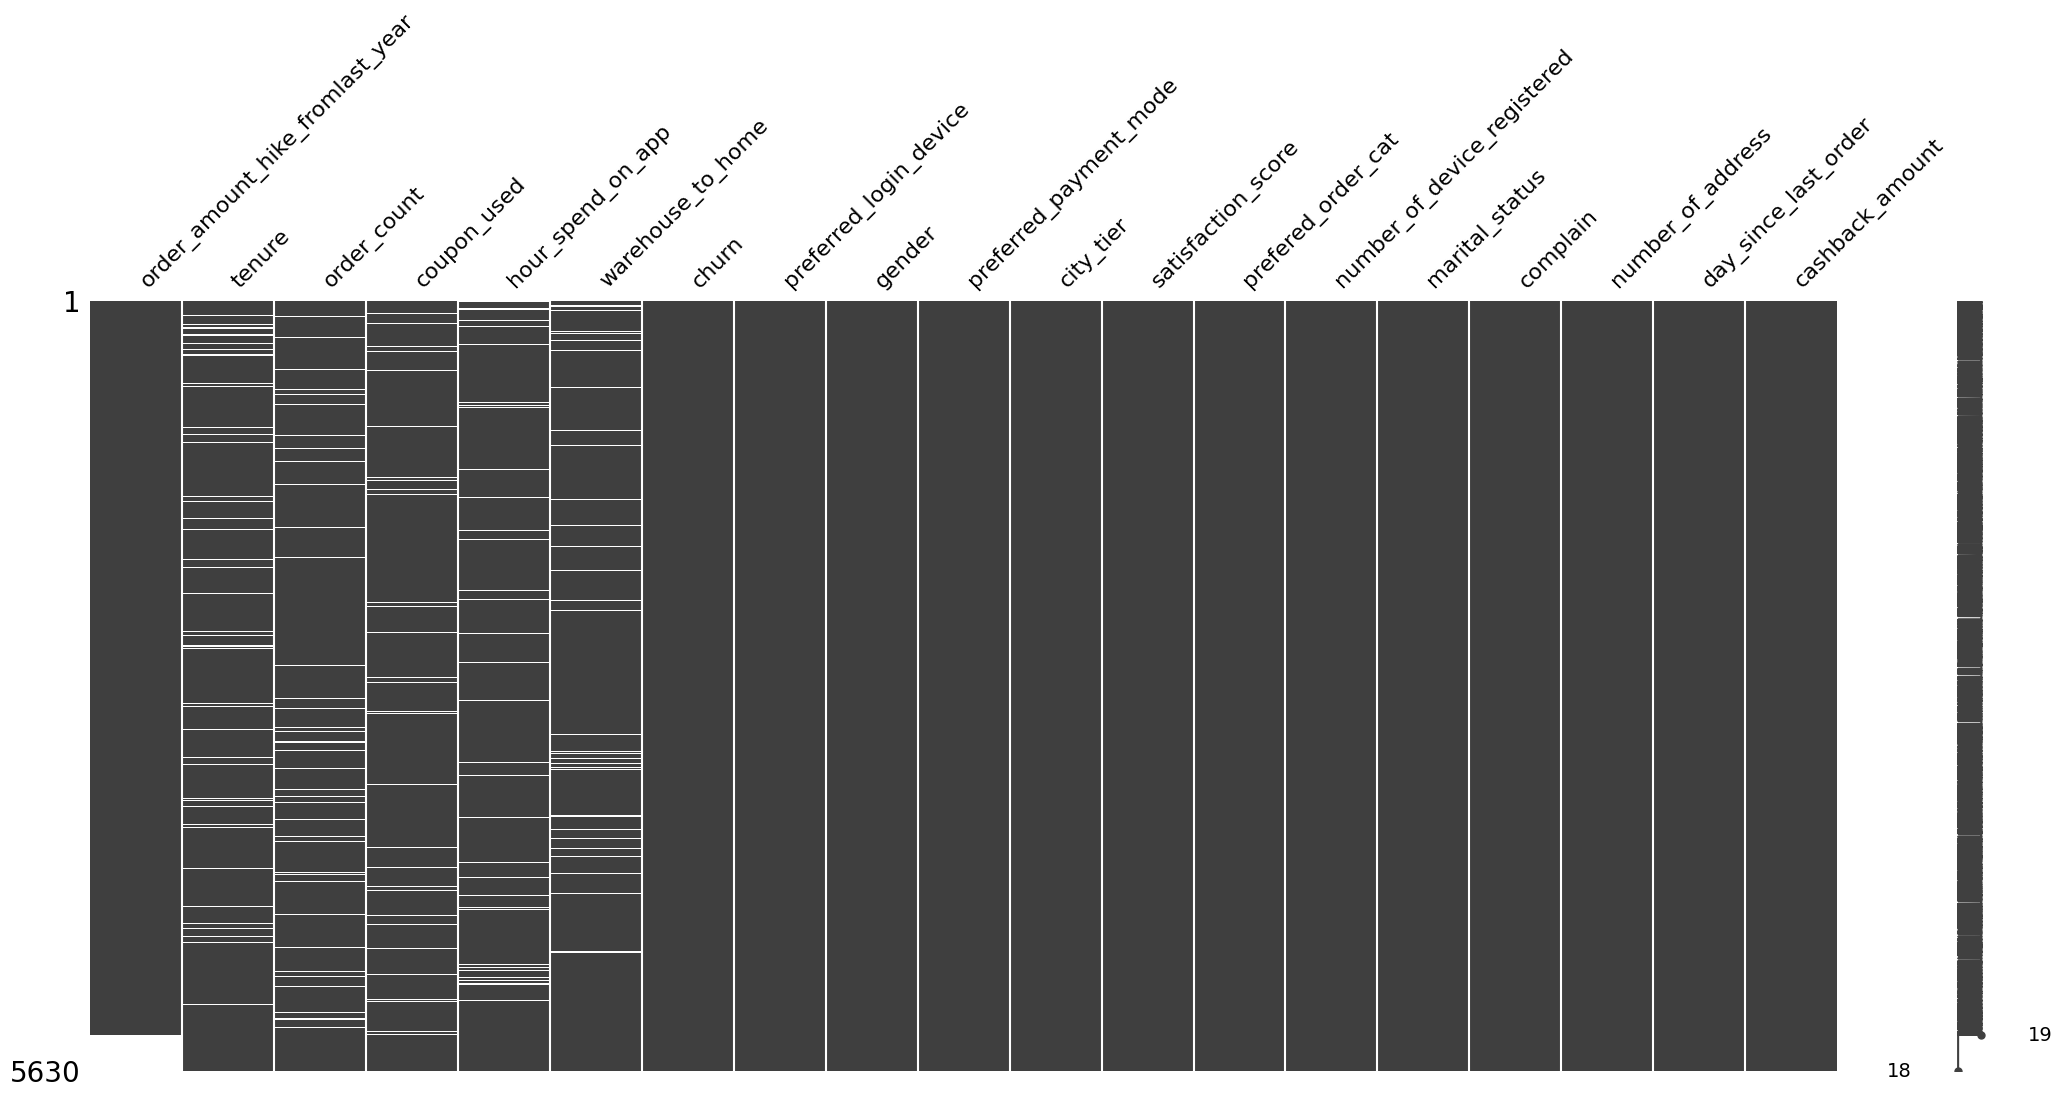

In [24]:
(
    data_df_clean
    .missing.sort_variables_by_missingness()
    .sort_values(by='order_amount_hike_fromlast_year')
    .pipe(missingno.matrix)
)

In [25]:
missing_variable = 'order_amount_hike_fromlast_year'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")


 media original : 15.707921714818266 | media sin nulos : 15.707921714818266
 mediana original : 15.0 | mediana sin nulos : 15.0
 moda original : 0    14.0
Name: order_amount_hike_fromlast_year, dtype: float64 | moda sin nulos : 0    14.0
Name: order_amount_hike_fromlast_year, dtype: float64


In [26]:
data_df_clean = data_df_clean_median

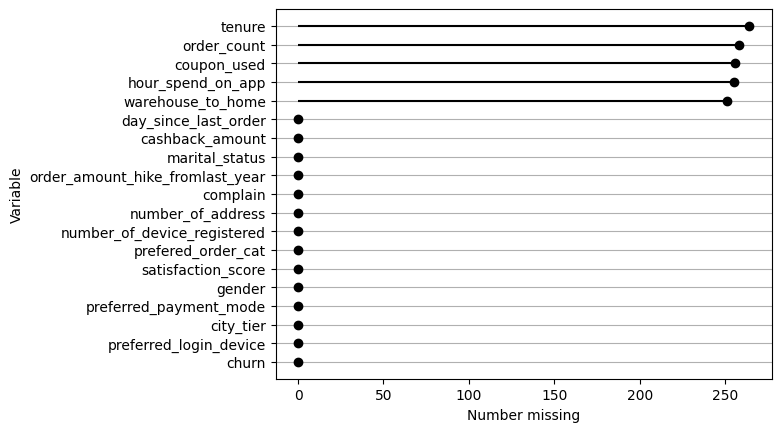

In [27]:
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE tenure

In [28]:
missing_variable = 'tenure'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")

 media original : 10.189899366380917 | media sin nulos : 10.189899366380917
 mediana original : 9.0 | mediana sin nulos : 9.0
 moda original : 0    1.0
Name: tenure, dtype: float64 | moda sin nulos : 0    1.0
Name: tenure, dtype: float64


In [29]:
data_df_clean = data_df_clean_median

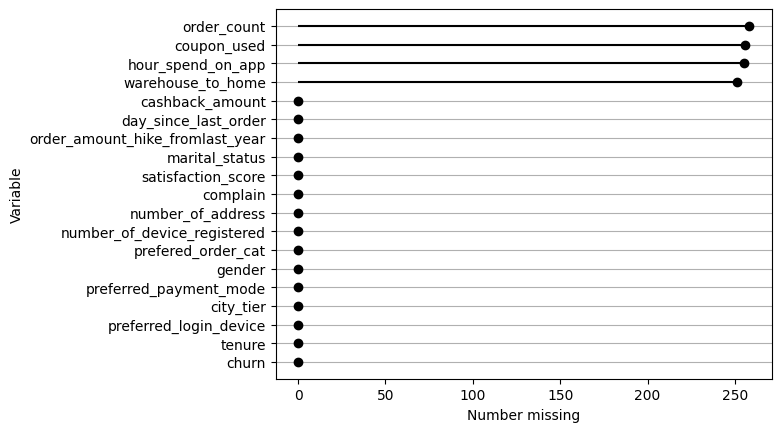

In [30]:
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE order_count

In [31]:
missing_variable = 'order_count'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode())
print(f" moda original : {data_df_clean[missing_variable].mode()} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()}")

 media original : 3.0080044676098288 | media sin nulos : 3.0080044676098288
 mediana original : 2.0 | mediana sin nulos : 2.0
 moda original : 0    2.0
Name: order_count, dtype: float64 | moda sin nulos : 0    2.0
Name: order_count, dtype: float64


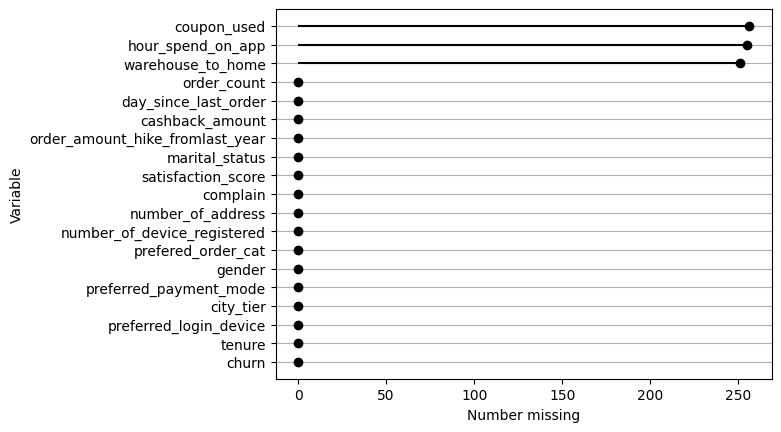

In [32]:
data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE coupon_used

In [33]:
missing_variable = 'coupon_used'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")

 media original : 1.7510234462225531 | media sin nulos : 1.7510234462225531
 mediana original : 1.0 | mediana sin nulos : 1.0
 moda original : 1.0 | moda sin nulos : 1.0


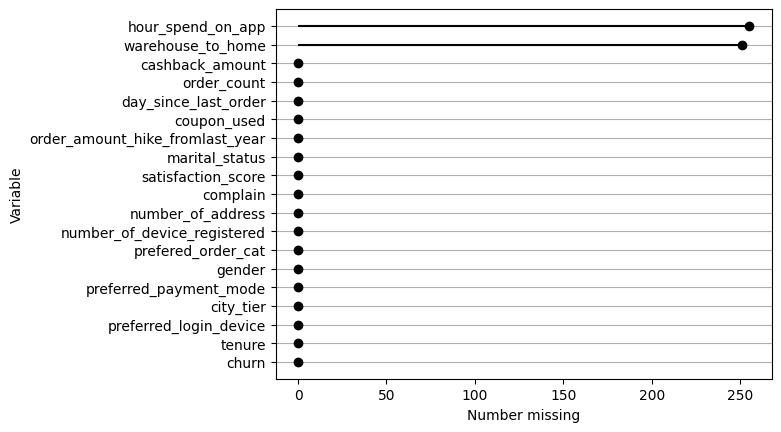

In [34]:
data_df_clean = data_df_clean_mode
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE hour_spend_on_app

In [35]:
missing_variable = 'hour_spend_on_app'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")

 media original : 2.9315348837209303 | media sin nulos : 2.9315348837209303
 mediana original : 3.0 | mediana sin nulos : 3.0
 moda original : 3.0 | moda sin nulos : 3.0


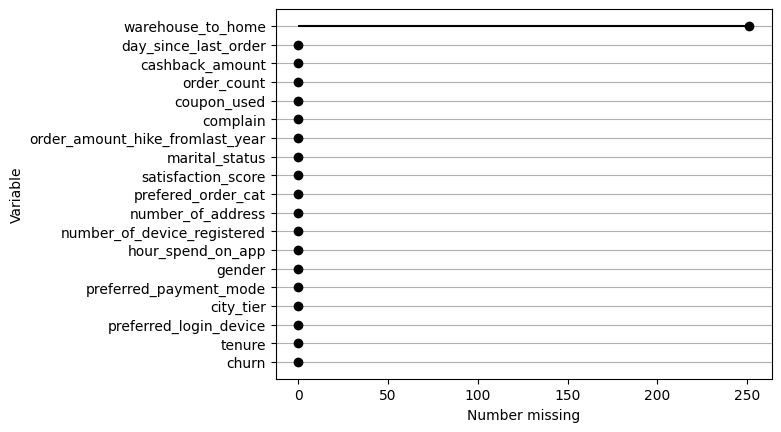

In [36]:
data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

## IMPUTACIÓN DE warehouse_to_home

In [37]:
missing_variable = 'warehouse_to_home'
data_df_clean_mean = data_df_clean.copy()
data_df_clean_mean[missing_variable] = data_df_clean_mean[missing_variable].fillna(data_df_clean_mean[missing_variable].mean())
print(f" media original : {data_df_clean[missing_variable].mean()} | media sin nulos : {data_df_clean_mean[missing_variable].mean()}")
data_df_clean_median = data_df_clean.copy()
data_df_clean_median[missing_variable] = data_df_clean_median[missing_variable].fillna(data_df_clean_median[missing_variable].median())
print(f" mediana original : {data_df_clean[missing_variable].median()} | mediana sin nulos : {data_df_clean_median[missing_variable].median()}")
data_df_clean_mode = data_df_clean.copy()
data_df_clean_mode[missing_variable] = data_df_clean_mode[missing_variable].fillna(data_df_clean_mode[missing_variable].mode()[0])
print(f" moda original : {data_df_clean[missing_variable].mode()[0]} | moda sin nulos : {data_df_clean_mode[missing_variable].mode()[0]}")

 media original : 15.639895891429633 | media sin nulos : 15.639895891429632
 mediana original : 14.0 | mediana sin nulos : 14.0
 moda original : 9.0 | moda sin nulos : 9.0


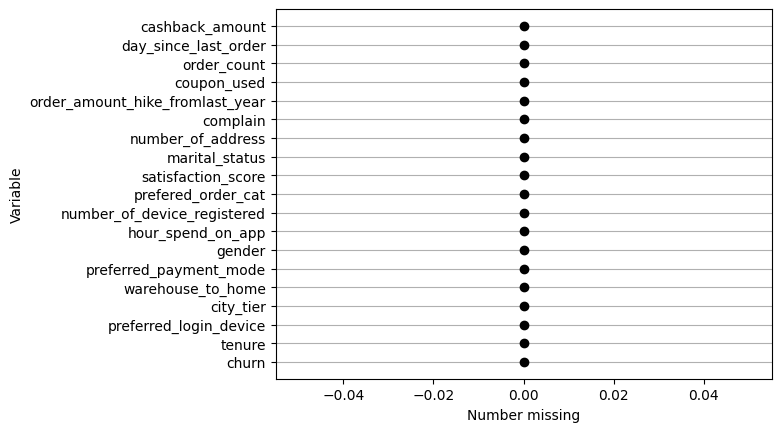

In [38]:
data_df_clean = data_df_clean_median
data_df_clean.missing.missing_variable_plot()

In [39]:
data_df_clean

,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [ ]:
data_df_clean.to_csv('ecom_data_clean.csv',index=False,encoding='utf-8')

# PASO 6 - CODIFICACIÓN DE VARIABLES CATEGORICAS

In [40]:
categorical_columns = data_df_clean.select_dtypes(object).columns
categorical_columns

Index(['preferred_login_device', 'preferred_payment_mode', 'gender',
       'prefered_order_cat', 'marital_status'],
      dtype='object')

In [41]:
for cc in categorical_columns:
  print("*"*50)
  print(data_df_clean[cc].value_counts())

**************************************************
preferred_login_device
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
**************************************************
preferred_payment_mode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
**************************************************
gender
Male      3384
Female    2246
Name: count, dtype: int64
**************************************************
prefered_order_cat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
**************************************************
marital_status
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


In [42]:
ordinal_cols = ['gender']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols

['prefered_order_cat',
 'marital_status',
 'preferred_payment_mode',
 'preferred_login_device']

## CREAMO SUN TRANSFORMER

In [43]:
import sklearn.compose
import sklearn.preprocessing

In [44]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(),onehot_cols),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder', OrdinalEncoder(),
                                 ['gender']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['prefered_order_cat', 'marital_status',
                                  'preferred_payment_mode',
                                  'preferred_login_device'])])

## APLICAMOS EL TRANSFOMER A LA VARIABLES CATEGORICAS

In [45]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(data_df_clean),
        columns = transformer.get_feature_names_out(),
        index=data_df_clean.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,gender,prefered_order_cat_Fashion,prefered_order_cat_Grocery,prefered_order_cat_Laptop & Accessory,prefered_order_cat_Mobile,prefered_order_cat_Mobile Phone,prefered_order_cat_Others,marital_status_Divorced,marital_status_Married,marital_status_Single,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [46]:
data_transformed_df = (
    data_transformed_df.clean_names(
        case_type="snake"
    )
)
data_transformed_df.columns

Index(['gender', 'prefered_order_cat_fashion', 'prefered_order_cat_grocery',
       'prefered_order_cat_laptop_&_accessory', 'prefered_order_cat_mobile',
       'prefered_order_cat_mobile_phone', 'prefered_order_cat_others',
       'marital_status_divorced', 'marital_status_married',
       'marital_status_single', 'preferred_payment_mode_cc',
       'preferred_payment_mode_cod', 'preferred_payment_mode_cash_on_delivery',
       'preferred_payment_mode_credit_card',
       'preferred_payment_mode_debit_card', 'preferred_payment_mode_e_wallet',
       'preferred_payment_mode_upi', 'preferred_login_device_computer',
       'preferred_login_device_mobile_phone', 'preferred_login_device_phone',
       'churn', 'tenure', 'city_tier', 'warehouse_to_home',
       'hour_spend_on_app', 'number_of_device_registered',
       'satisfaction_score', 'number_of_address', 'complain',
       'order_amount_hike_fromlast_year', 'coupon_used', 'order_count',
       'day_since_last_order', 'cashback_amount

In [47]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("prefered_order_cat_", "order_").replace("preferred_payment_mode_", "payment_").replace("preferred_login_device_", "login_").replace("marital_status_", "")
)
data_transformed_df

,gender,order_fashion,order_grocery,order_laptop_&_accessory,order_mobile,order_mobile_phone,order_others,divorced,married,single,...,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [48]:
data_transformed_df = data_transformed_df.rename(
    columns={
        "order_laptop_&_accessory":"order_laptop",
        "order_mobile":"order_phone",
        "payment_cash_on_delivery":"payment_cash",
        "payment_credit_card":"payment_credit",
        "payment_debit_card":"payment_debit",
        "payment_e_wallet":"payment_ewallet",
        "login_mobile_phone":"login_mobile",
        "warehouse_to_home":"distance",
        "hour_spend_on_app":"hour_spend",
        "number_of_device_registered":"device_registered",
        "number_of_address":"number_address",
        "order_amount_hike_fromlast_year":"order_lastyear",
        "day_since_last_order":"days_lastorder"
    }
)
data_transformed_df.columns

Index(['gender', 'order_fashion', 'order_grocery', 'order_laptop',
       'order_phone', 'order_mobile_phone', 'order_others', 'divorced',
       'married', 'single', 'payment_cc', 'payment_cod', 'payment_cash',
       'payment_credit', 'payment_debit', 'payment_ewallet', 'payment_upi',
       'login_computer', 'login_mobile', 'login_phone', 'churn', 'tenure',
       'city_tier', 'distance', 'hour_spend', 'device_registered',
       'satisfaction_score', 'number_address', 'complain', 'order_lastyear',
       'coupon_used', 'order_count', 'days_lastorder', 'cashback_amount'],
      dtype='object')

In [49]:
data_transformed_df

,gender,order_fashion,order_grocery,order_laptop,order_phone,order_mobile_phone,order_others,divorced,married,single,...,hour_spend,device_registered,satisfaction_score,number_address,complain,order_lastyear,coupon_used,order_count,days_lastorder,cashback_amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,5.0,5.0,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3.0,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4.0,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.0,179.0


In [50]:
data_transformed_df.to_csv('ecom_data_transformed.csv',index=False,encoding='utf-8')